# <center>Analyse des ventes d'une librairie</center>

# <center>Rassemblement + Dates</center>

## Importation des librairies

In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

## Importation des dataset

In [2]:
customers_bis = pd.read_csv("customers_bis.csv")

products = pd.read_csv("products.csv")

transactions = pd.read_csv("transactions.csv")

***

***

## <center>Rassemblement</center>

*L'analyse de mes dataset m'a permis de mieux les connaitre et comprendre, j'ai donc plus d'informations pour pouvoir continuer mon travail.*

*Au vu des différentes demandes quu m'on été faites un rassemblement des dataset est à faire.*

*Il faut dans un premier temps que je retire les valeurs test car elle ne sont pas des valeurs réelles. Et donc fausserai mon analyse des ventes.*

In [3]:
customers_bis = customers_bis[customers_bis.client_id != "ct_1"]
customers_bis = customers_bis[customers_bis.client_id != "ct_0"]

In [4]:
products = products[products.id_prod != "T_0"]

In [5]:
transactions = transactions[transactions.id_prod != "T_0"]

In [6]:
print("Pour rappel au début du projet --> Customers shape --> (8623, 3)")
print("Pour rappel au début du projet --> Products shape --> (3287, 3)")
print("Pour rappel au début du projet --> Transactions shape --> (679532, 4)")

Pour rappel au début du projet --> Customers shape --> (8623, 3)
Pour rappel au début du projet --> Products shape --> (3287, 3)
Pour rappel au début du projet --> Transactions shape --> (679532, 4)


In [7]:
print("Customers_bis shape -->", customers_bis.shape)
print("Products shape -->", products.shape)
print("Transactions shape -->", transactions.shape)

Customers_bis shape --> (8621, 5)
Products shape --> (3286, 3)
Transactions shape --> (679332, 4)


In [8]:
print("ct_1 et ct_0 dans customers_bis représentaient 2 lignes, 8623 - 2 = 8621")
print("T_0 représentaient 1 lignes, 3287 - 1 = 3286")
print("Les lignes 'test' représentaient 200 lignes, 679532 - 200 = 679332")

ct_1 et ct_0 dans customers_bis représentaient 2 lignes, 8623 - 2 = 8621
T_0 représentaient 1 lignes, 3287 - 1 = 3286
Les lignes 'test' représentaient 200 lignes, 679532 - 200 = 679332


In [9]:
customers_bis.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [10]:
customers_bis.columns

Index(['client_id', 'sex', 'birth', 'age'], dtype='object')

In [11]:
transactions.duplicated().sum()

0

*Il y avait des doublons dans transactions, ceux_ci correspondaient tous à des lignes "test".*

*Du fait qu'il n'y ait plus de lignes "test", il n'y a plus de doublons dans transactions.*

In [12]:
customers_bis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8621 entries, 0 to 8622
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8621 non-null   object
 1   sex        8621 non-null   object
 2   birth      8621 non-null   int64 
 3   age        8621 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 336.8+ KB


In [13]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3286 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 102.7+ KB


In [14]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679332 non-null  object
 1   date        679332 non-null  object
 2   session_id  679332 non-null  object
 3   client_id   679332 non-null  object
dtypes: object(4)
memory usage: 25.9+ MB


*Il y a 0 nan dans chacun des 3 dataset.*

*Maintenant je peux procéder aux rassemblement.*

*Le dataset transactions est celui qui permet de rassembler customers et products pour en former plus qu'un seul dataset.*

##### Rassemblement de customers et transactions

*Je veux dans un premier temps insérer customers (df y) dans transactions (df x), il faut donc que j'utilise un "left join".*

***"Left Join or Left outer join:To include all the rows of your data frame x and only those from y that match, specify how=‘left’."***

*Il faudra que j'ai bien 679332 lignes (la longueur de transactions doit rester intacte) et 7 colonnes (rajouts des colonnes sex birth et age).*

In [15]:
df = transactions.merge(customers_bis, on='client_id', how="left")

In [16]:
df.shape

(679332, 7)

In [17]:
df.head(10)

,id_prod,date,session_id,client_id,sex,birth,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,36
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988,34
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968,54
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000,22
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980,42
5,0_1418,2022-10-20 15:59:16.084030,s_285425,c_1478,f,1972,50
6,0_1475,2022-06-03 04:45:09.871601,s_218033,c_7782,m,1981,41
7,0_2110,2021-06-26 14:48:55.311418,s_54122,c_7456,f,1985,37
8,0_1156,2022-12-27 12:27:40.641366,s_318058,c_7363,f,1982,40
9,1_299,2021-11-29 15:54:25.880121,s_126880,c_1847,m,1973,49


In [18]:
df.isnull().sum()*100/len(df)

id_prod       0.0
date          0.0
session_id    0.0
client_id     0.0
sex           0.0
birth         0.0
age           0.0
dtype: float64

##### Rassemblement de products et df

*Je veux dans un deuxième temps insérer products (df y) dans df (df x), il faut donc que j'utilise un "left join".*

***"Left Join or Left outer join:To include all the rows of your data frame x and only those from y that match, specify how=‘left’."***

*Il faudra que j'ai bien 679332 lignes (la longueur de df doit rester intacte) et 9 colonnes (rajouts des colonnes price et categ).*

In [19]:
df = df.merge(products, on='id_prod', how="left")

In [20]:
df.shape

(679332, 9)

In [21]:
df.head(10)

,id_prod,date,session_id,client_id,sex,birth,age,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,36,4.18,0.0
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988,34,15.99,1.0
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968,54,7.99,0.0
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000,22,69.99,2.0
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980,42,4.99,0.0
5,0_1418,2022-10-20 15:59:16.084030,s_285425,c_1478,f,1972,50,8.57,0.0
6,0_1475,2022-06-03 04:45:09.871601,s_218033,c_7782,m,1981,41,11.99,0.0
7,0_2110,2021-06-26 14:48:55.311418,s_54122,c_7456,f,1985,37,7.04,0.0
8,0_1156,2022-12-27 12:27:40.641366,s_318058,c_7363,f,1982,40,12.79,0.0
9,1_299,2021-11-29 15:54:25.880121,s_126880,c_1847,m,1973,49,13.99,1.0


In [22]:
df.isnull().sum()*100/len(df)

id_prod       0.000000
date          0.000000
session_id    0.000000
client_id     0.000000
sex           0.000000
birth         0.000000
age           0.000000
price         0.032532
categ         0.032532
dtype: float64

*Ici je remarque que j'ai des nan dans les colonnes price et categ pour le dataset df.*

In [23]:
na = df.loc[df.isnull().any(axis=1)]
na["id_prod"].value_counts()

0_2245    221
Name: id_prod, dtype: int64

In [24]:
transactions[transactions["id_prod"]=="0_2245"].value_counts()

id_prod  date                        session_id  client_id
0_2245   2021-03-01 00:09:29.301897  s_3         c_580        1
         2022-07-15 06:19:44.035000  s_238618    c_4765       1
         2022-05-21 18:39:25.649231  s_211970    c_6268       1
         2022-05-27 04:57:50.401531  s_214607    c_2288       1
         2022-05-29 23:24:51.621799  s_216074    c_2189       1
                                                             ..
         2021-11-24 17:35:59.911427  s_124474    c_5120       1
         2021-11-27 04:57:50.401531  s_125685    c_2288       1
         2021-11-30 21:49:23.614810  s_127497    c_4721       1
         2021-12-03 14:14:40.444177  s_128815    c_6189       1
         2023-02-21 04:06:19.106398  s_344671    c_5352       1
Length: 221, dtype: int64

In [25]:
na.head(10)

,id_prod,date,session_id,client_id,sex,birth,age,price,categ
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,m,1940,82,NaN,NaN
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,f,1963,59,NaN,NaN
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,m,1978,44,NaN,NaN
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,m,1991,31,NaN,NaN
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,m,1973,49,NaN,NaN
17392,0_2245,2023-01-21 18:39:25.649231,s_330241,c_6268,m,1991,31,NaN,NaN
20519,0_2245,2022-11-20 20:21:06.505658,s_300389,c_8524,f,1982,40,NaN,NaN
21337,0_2245,2021-10-20 13:11:05.671456,s_107564,c_1746,m,1994,28,NaN,NaN
21706,0_2245,2021-04-17 16:43:16.543156,s_21906,c_7808,m,1977,45,NaN,NaN
23840,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964,f,1982,40,NaN,NaN


*J'ai 221 nan pour un seul id_product qui est le 0_2245.*

*J'aurai donc des transactions qui aurait été faites sur un produit n'ayant pas de prix, ni de catégorie.*

In [26]:
products[products["id_prod"].str.contains("0_2245")]

,id_prod,price,categ


In [27]:
transactions[transactions["id_prod"].str.contains("0_2245")]

,id_prod,date,session_id,client_id
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746
10106,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713
11727,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108
15675,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391
16377,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954
...,...,...,...,...
669730,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131
670682,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167
671286,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453
675679,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098


*Le produit ayant l'id_prod 0_2245, n'existe pas dans le dataset products.*

*Mais on le retrouve dans le dataset transactions et donc dans le dataset df.*

*Donc étant donné que des transactions existes pour l'id_prod 0_2242, il faudrait que je lui impute des valeurs, je vais dans un premier temps vérifier les distributions pour price et categ.*

<AxesSubplot:xlabel='price', ylabel='Count'>

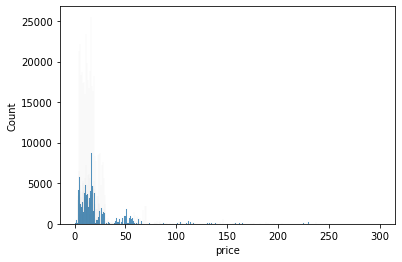

In [28]:
sns.histplot(data=df, x="price")

<AxesSubplot:xlabel='price'>

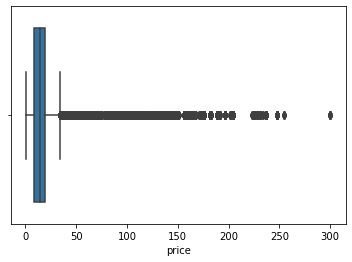

In [29]:
sns.boxplot(x = df["price"])

<AxesSubplot:xlabel='categ', ylabel='Count'>

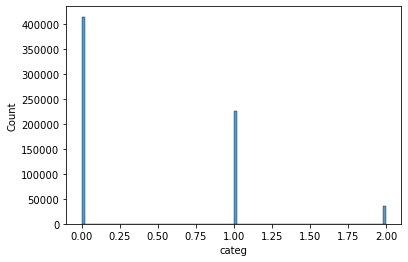

In [30]:
sns.histplot(data=df, x="categ")

*Au vu de mes données je vais faire une imputation par la médiane pour la colonne "price" et une imputation par le mode pour la colonne "categ".*

In [31]:
df['price'] = df['price'].fillna(df['price'].median())
df['categ'] = df['categ'].fillna(df['categ'].mode()[0])

In [32]:
df.isnull().sum()*100/len(df)

id_prod       0.0
date          0.0
session_id    0.0
client_id     0.0
sex           0.0
birth         0.0
age           0.0
price         0.0
categ         0.0
dtype: float64

In [33]:
df.head()

,id_prod,date,session_id,client_id,sex,birth,age,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,36,4.18,0.0
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988,34,15.99,1.0
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968,54,7.99,0.0
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000,22,69.99,2.0
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980,42,4.99,0.0


In [34]:
df.shape

(679332, 9)

***

***

## <center>Découpage des dates</center>

In [35]:
df["hours"] = pd.to_datetime(df["date"]).dt.hour
df["minutes"] = pd.to_datetime(df["date"]).dt.minute
df["day"] = pd.to_datetime(df["date"]).dt.day
df["month"] = pd.to_datetime(df["date"]).dt.month
df["year"] = pd.to_datetime(df["date"]).dt.year

df["date"]= pd.to_datetime(df["date"])

In [36]:
df.head()

,id_prod,date,session_id,client_id,sex,birth,age,price,categ,hours,minutes,day,month,year
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,36,4.18,0.0,13,21,20,5,2022
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988,34,15.99,1.0,7,55,2,2,2022
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968,54,7.99,0.0,15,44,18,6,2022
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000,22,69.99,2.0,4,19,24,6,2021
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980,42,4.99,0.0,8,22,11,1,2023


***

***

***Sauvegarde des modifications apportées au dataset***

In [37]:
df.to_csv('df.csv')